# Homework 4 (80 points)

In this homework, you will learn about:

* Using memoization to speed up a recursive function with overlapping subproblems
* Using tables ("programming") to speed up a recursive function with overlapping subproblems
* Using dynamic programming to solve optimization problems

In [126]:
import array
import time
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce

In [127]:
def timer(f,arr):
    start = time.time()
    f(arr)
    end = time.time()
    return end - start

In [128]:
def compareTwoFunctions(f1,f2,n):
    
    time_f1 = array.array('f',n * [0])
    time_f2 = array.array('f',n * [0])
    for i in range(n):        
        time_f1[i] = timer(f1,i)
        time_f2[i] = timer(f2,i)
        
    x = range(n)
    plt.xlabel('Problem size')
    plt.ylabel('Time (s)')
    plt.plot(x, time_f1, "-b", label=f1.__name__)
    plt.plot(x, time_f2, "-r", label=f2.__name__)
    plt.title("Comparison of different functions") 
    plt.legend(loc="upper left")

# Part 1: 10 points

Before we solve difficult problems, let's practice the fundamental techniques by speeding up the calculation of Catalan numbers. Catalan numbers are defined as follows:

$$
C(n) =     
\begin{cases}
  1, & \text{if}\ n=0 \\
  \sum_{i=0}^{n-1} C(i) \times C(n-i), & \text{otherwise}
\end{cases}
$$

This definition can be transcribed into a simple (and naive) implementation. 

In [129]:
def catalan(n):
    if n <= 1:
        return 1
 
    res = 0
    for i in range(n):
        res += catalan(i) * catalan(n-i-1)
 
    return res

In [130]:
catalan(10)

16796

You should convince yourself that this implementation is bad because it is going to recompute the same thing over and over again. You should also convince yourself that the complexity of this implementation is exponential in n, which is very bad.

**Problem 1 (5 points): use memoization to speed up the above implementation**

In [131]:
memo = {}
def catalan_mem(n):
    if n == 0:
        return 1
    
    v = 0 
    if n not in memo:
        for i in range(n):
            v += (catalan_mem(i)) * (catalan_mem(n-i-1))
        memo[n] = v
    
    return memo[n]

In [132]:
catalan_mem(10)

16796

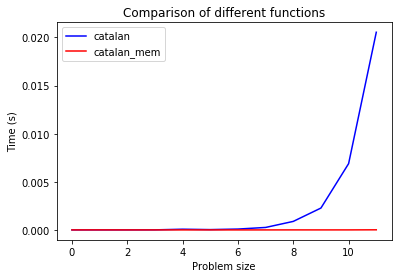

In [133]:
compareTwoFunctions(catalan,catalan_mem,12)

**Problem 2 (5 points): use a table to compute Catalan numbers bottom-up.**

In [134]:
def catalan_table(n):
    table = [1,1]
    if n <= 1:
        return 1
    
    for i in range(2, n+1):
        v = 0 
        for j in range(i):
            v += table[j] * table[i-j-1]
        table.append(v)
        
    return table[n]

In [139]:
for i in range(5, 11):
    print(i, " = ", catalan_table(i))

5  =  42
6  =  132
7  =  429
8  =  1430
9  =  4862
10  =  16796


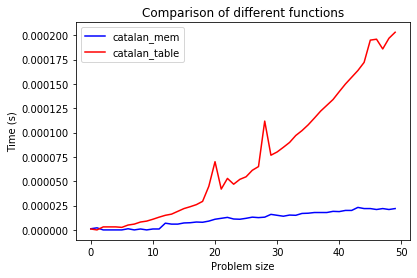

In [140]:
compareTwoFunctions(catalan_mem,catalan_table,50)

# Part 2: 30 points

In this problem, your goal is to count how many combinations of S different coins can sump to to some value n.
The order of coins doesn’t matter.

*Example 1:* for n = 4 and S = {1,2,3}, there are four solutions: {1,1,1,1},{1,1,2},{2,2},{1,3} and the output should be 4. 

*Example 2:* for n = 10 and S = {2, 5, 3, 6}, there are five solutions: {2,2,2,2,2}, {2,2,3,3}, {2,2,6}, {2,3,5} and {5,5} and the output should be 5.

**Problem 3 (15 points): implement a recursive function that counts the number of combinations. The function should take two arguments: a list of integers S and an integer n. The function should return an integer.**

In [121]:
def count(S, n):
    if n == 0:
        return 1
    
    if n < 0:
        return 0 
    
    cnt = 0 
    for i in range(len(S)):
        cnt += count(S[:i+1], n - S[i])
        
    return cnt

**Problem 4 (15 points): re-implement the function above so that it does not use recursion and instead builds a table of solutions bottom-up.**

In [122]:
def countDyn(S,n):
    table = [0] * (n + 1)
    table[0] = 1
    
    for i in range(len(S)):
        for j in range(n + 1):
            if S[i] <= j:
                table[j] = table[j] + table[(j - S[i])]
                
    return table[n]

In [123]:
S = [3, 5, 6, 8, 11, 16]
n = 50

In [124]:
count(S, n)

138

In [125]:
countDyn(S, n)

138

# Part 3 (40 points)

*Definition 1:* A subsequence is a sequence that can be derived from another sequence by deleting some or no elements without changing the order of the remaining elements. For example, the sequence $\langle A,B,D\rangle$  is a subsequence of $\langle A,B,C,D,E,F\rangle$  obtained after removal of elements $C$, $E$, and $F$.

*Definition 2:* A string is a sequence of characters. 

*Definition 3:* A palindrome is a string which reads the same backward as forward, such as madam or racecar.

*Definition 4:* **Longest Palindrome Substring** problem.

   **Input:** A string *str*.

   **Output:** A substring of *str* that is a palindrome.

In this problem, your goal is to use dynamic programming to design and implement a solution to the Longest Palindrom Substring problem. For reference, I'm happy to provide this horribly naive solution that enumerates all the possible substrings.  

In [54]:
def horribleSolution(str):
    assert(len(str) > 1)
    
    # We will find all the palindromes and store them in this list
    palindromes = []
    
    # This function is used to tell if a string is a palindrome or not
    def is_palindrome(kept):
        if (len(kept) == 1) or (len(kept) == 0):
            return True
        elif len(kept) == 2:
            return kept[0] == kept[1]
        else:
            return (kept[0] == kept[-1]) and (is_palindrome(kept[1:-1]))
    
    # This function enumerates all the possible substrings and checks if they are palindromes
    def bruteForce(kept,leftover):
        if len(leftover) == 0:
            if is_palindrome(kept):
                palindromes.append(kept)
                
        else:
            bruteForce(kept,leftover[1:])
            bruteForce(kept + [leftover[0]],leftover[1:])        
    
    bruteForce([],str)
    
    # Find one of the longest palindrome
    lps = reduce(lambda x, y: x if len(x) > len(y) else y, palindromes)
    
    return ''.join(lps)   

In [116]:
horribleSolution("racecarisfast")

'racecar'

**Problem 5 (40 points): Use dynamic programming to solve the Longest Palindrome SubString problem in $O(n^2)$ where n is the length of the input string. I strongly recommend that you do so by following the method seen in class. First, design and implement a function that counts the solutions recursively. Second, design and implement a function that counts the solutions using a table and in $O(n^2)$. Third, design and implement a function that constructs the solution.**

In [118]:
def lps(s):
    """
    Input : s (string to check the subsequence palindrome)
    Output : ans (subsequence palindrome of the string)
    
    def lps(s) : delivers string and table - mem, to the helper function 
    
    def helper(s, 0, N-1, mem)
        - recursive function to track the palindrome 
        - Base Cases
            - Base Case #1 : if i == j
                - length of palindrome is 1
            - Base Case #2 : if i != j
                - Base Case #2.1 : if i == j + 1 & s[i] != s[j]
                    - length of palindrome is 0 
                - Base Case #2.2 : if i == j + 1 & s[i] = s[j]
                    - length of palindrome is 2 
                - Base Case #2.3 : if i != j & s[i] != s[j]
                    - length of palindrome is max(lp(s, i+ 1, j), lp(s, i, j-1))
            
    """
    
    N = len(s)
    if N == 0:
        return ""
    
    # implement a table in driver function 
    mem = [[None for j in range(N)] for i in range(N)] # make 2-d array : table 
    helper(s,0,N-1,mem)
    
    return stringMaker(mem, s, N)

def stringMaker(mem, s, N):
    ans = ""
    
    for i in mem[0][N-1]:
        ans += s[i]
    
    return ans 
        
def helper(s,i,j,mem):
    # recursive solution to count the solutions
    if j < i:
        return []
    elif mem[i][j]:
        return mem[i][j]
    elif i == j: # base case 1
        mem[i][j] = [i]
        return mem[i][j]
    else: 
        mem[i][j] = [] # check if the string has passed through the table 
        if s[i] == s[j]:
            mem[i][j] = [i] + helper(s,i+1,j-1,mem) + [j]
        left = helper(s,i+1,j,mem) # base case 2.3
        right = helper(s,i,j-1,mem) # base case 2.3
        if len(left) > len(mem[i][j]):
            mem[i][j] = left
        if len(right) > len(mem[i][j]):
            mem[i][j] = right
        return mem[i][j]

In [119]:
lps('racecarisfast')

'racecar'